In [1]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import lightgbm as lgb

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
file_folder = '/Users/rosleeb/disaster_tweets'
train = pd.read_csv(f'{file_folder}/train.csv')
test = pd.read_csv(f'{file_folder}/test.csv')

In [3]:
#train.head()

target = train['target']
train.drop(['target'], axis = 1)

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...


In [4]:
target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [5]:
def lowercase(tweet):
    lower_tweet = tweet.lower()
    return lower_tweet


lowercases = []


for i in range(train['text'].count()):
    lowered = lowercase(train['text'][i])
    lowercases.append(lowered)

low_tweets = pd.DataFrame(lowercases, columns = ['lowered_text'])

#low_tweets.head()

train = train.join(low_tweets)

train.head()

,id,keyword,location,text,target,lowered_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [6]:
train.drop(['target'], axis = 1)

,id,keyword,location,text,lowered_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,@aria_ahrary @thetawniest the out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,police investigating after an e-bike collided ...


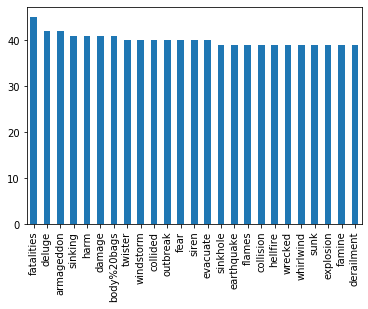

In [7]:
#Unique Keywords
#unique_keyword = train['keyword'].unique()

pd.value_counts(train['keyword'])[0:25].plot(kind='bar')

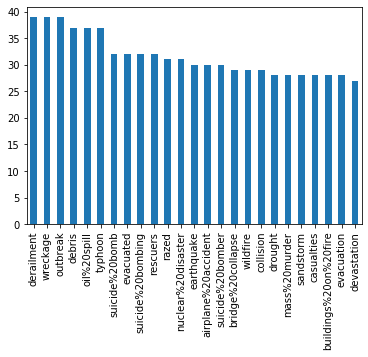

In [8]:
train_fakes = train.loc[train['target'] == 1]

pd.value_counts(train_fakes['keyword'])[0:25].plot(kind='bar')

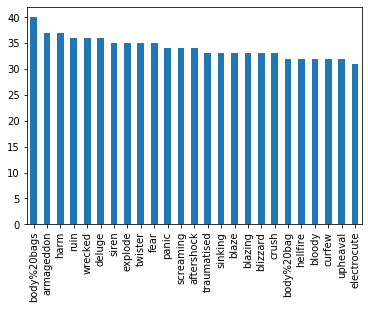

In [9]:
train_real = train.loc[train['target'] == 0]

pd.value_counts(train_real['keyword'])[0:25].plot(kind='bar')

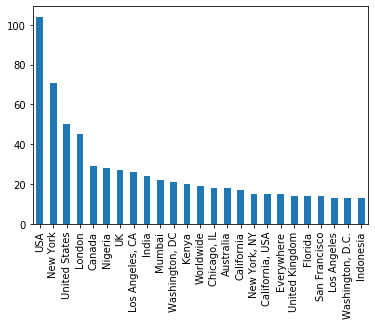

In [10]:
pd.value_counts(train['location'])[0:25].plot(kind='bar')

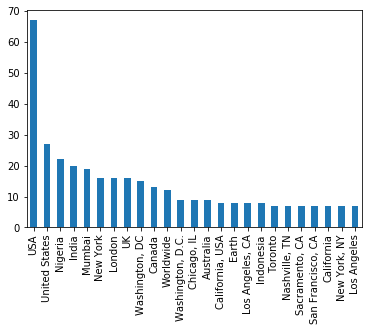

In [11]:
loc_fakes = train.loc[train['target'] == 1]

pd.value_counts(loc_fakes['location'])[0:25].plot(kind='bar')

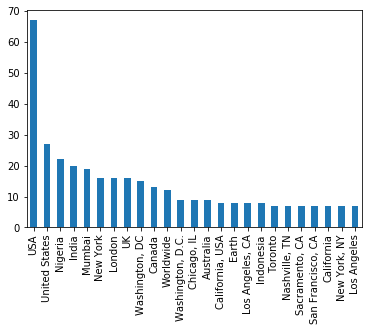

In [12]:
loc_real = train.loc[train['target'] == 1]

pd.value_counts(loc_real['location'])[0:25].plot(kind='bar')

In [13]:
unique_location = train['location'].unique()

for loc in unique_location:
    print(loc)

nan
Birmingham
Est. September 2012 - Bristol
AFRICA
Philadelphia, PA
London, UK
Pretoria
World Wide!!
Paranaque City
Live On Webcam
milky way
GREENSBORO,NORTH CAROLINA
England.
Sheffield Township, Ohio
India
Barbados
Anaheim
Abuja
USA
South Africa
Sao Paulo, Brazil
hollywoodland 
Edmonton, Alberta - Treaty 6
Inang Pamantasan
Twitter Lockout in progress
Concord, CA
Calgary, AB
San Francisco
CLVLND
Nashville, TN
Santa Clara, CA
UK
St. Louis, MO
Walker County, Alabama
Australia
North Carolina
Norf Carolina
San Mateo County, CA
Njoro, Kenya
Your Sister's Bedroom
Arlington, TX
South Bloomfield, OH
New Hanover County, NC
Maldives
Manchester, NH
Wilmington, NC
global
Alberta | Sask. | Montana
Charlotte
Baton Rouge, LA
Hagerstown, MD
Gloucestershire , UK
Nairobi, Kenya
Instagram - @heyimginog 
304
Switzerland
US
Somewhere Only We Know ?
Belgium
dope show
Oshawa, Canada
Baker City Oregon
United States
marysville ca 
Hermosa Beach, CA
19.600858, -99.047821
Pennsylvania
Salt Lake City, Utah
Palo 

Vancouver BC
Devon/London 
ITALY
Atlanta g.a.
EVERYWHERE
Washington DC
Mount Vernon, NY
Jackson TN
Los Angeles, London, Kent
USA, Haiti, Nepal
Portoviejo-Manabi-Ecuador
chillin at ceder rapids
en el pais de los arrechos
Hinton, W.Va.
Philadelphia, PA USA
Naperville
Lima, Peru
In Your Notifications 
Fort Worth, Texas
Dappar (Mohali) Punjab
los angeles
nearest trash can 
USA 
Los Angeles, California
Morocco
Pedophile hunting ground
U.S.
Visit our  dedicated website @
Asia Pacific   
Ojodu,Lagos
Kelowna, BC
48.870833,2.399227
UK  & Germany
Manila
Magnolia
(Spain)
new york
Palestine 
Na:tinixw / Hoopa, Berkeley
USA (Formerly @usNOAAgov)
Chappaqua NY and Redlands CA
NYC-LA-MIAMI
Okanagan Valley, BC
Caribbean
San Francisco , CA
Las Cruces, NM
Meereen 
Football Field
i luv raquel
austin, texas
Philadelphia
Macon, Georgia
Ashxjonespr@gmail.com
miami
Abuja,Nigeria
At Work
Waialua, Hawaii
Coconut Creek, Florida
icon: cheese3d
@notoriousD12
Morris, IL
Lynwood, CA
Where the money at
mi
Gainesville

Desert Storm?? |BCHS|
Ottawa, Ontario
Santiago de Chile
CamaquÌ£/Pelotas
Taylor Swift
Austin/Los Angeles
U.S.A and Canada
In a crazy genius mind
hatena bookmark
Docker container
DMV
philly 
south africa eastern cape
Amazon Seller , Propagandist
NJ/NY/NM/NE/ND
3???2???????
Cimahi,West Java,Indonesia
Bukittinggi  ?? Sumatera Barat
Stateless Global Citizen
Halton Region
Los Angeles, Calif.
Warm Heart Of Africa
ÌÏT: 27.9136024,-81.6078532
VÌ_sterÌ´s, Sweden
Reality
Roadside
London/Lagos/FL ÌÏT: 6.6200132,
The Land of MAss Stupidity
dorito land
Gidi
Email: Lovethterry@gmail.com
Homs- Syria
lagos. Unilag
Did anybody see me here ??
Na waffi
Helsinki
Saudi Arabia
Garden City, NY
africa
Birmingham, United Kingdom
nigeria
Minority Privilege, USA
Paris
Chicago IL
Principality of Zeron
GCC
On a beach 
EARTH
Tokyo & Osaka
mainly California
18 | 509 
glasgow
Bon Temps Louisiana
my house
Beacon Hills
West Coast, USA
Gaborone, Botswana
Bracknell
{GoT | Modern AU | Lizz}
Cardiff, Wales
NAIROBI  KENYA 


In [14]:
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords

example_tokens = word_tokenize(train['lowered_text'][0])

stop_words = set(stopwords.words('english'))

filtered_sentence = [w for w in example_tokens if not w in stop_words]

filtered_sentence = []

for w in example_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(example_tokens)
print(filtered_sentence)

['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
['deeds', 'reason', '#', 'earthquake', 'may', 'allah', 'forgive', 'us']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(filtered_sentence)
print(vectorizer.vocabulary_)
vector = vectorizer.transform(filtered_sentence)
print(vector.shape)

{'deeds': 1, 'reason': 5, 'earthquake': 2, 'may': 4, 'allah': 0, 'forgive': 3, 'us': 6}
(8, 7)


In [17]:
tfidf_vec = TfidfVectorizer(stop_words='english', strip_accents = 'unicode', ngram_range=(1,2))
#tfidf_vec.fit_transform(train['text'].values.tolist() + test['text'].values.tolist())
tfidf_vec.fit_transform(train['lowered_text'].values.tolist())
train_tfidf = tfidf_vec.transform(train['lowered_text'].values.tolist())
#test_tfidf = tfidf_vec.transform(test['text'].values.tolist())

In [18]:
train_tfidf

<7613x73892 sparse matrix of type '<class 'numpy.float64'>'
	with 142765 stored elements in Compressed Sparse Row format>

In [64]:
X_train, X_valid, y_train, y_valid = train_test_split(train_tfidf, target, test_size = 0.3, random_state = 0)

In [65]:
reg_model = LogisticRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_valid)
f1_score(y_valid, y_pred_reg, average='weighted')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7812300174358141

In [66]:
forest_model = RandomForestClassifier(n_estimators = 200)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_valid)
f1_score(y_valid, y_pred_forest, average='weighted')

0.7746402852546536

In [67]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_valid)
f1_score(y_valid, y_pred_svm, average='weighted')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4328103891281243

In [68]:
n_estimators = 100000
n_jobs = -1
verbose = 500
early_stopping_rounds = 200
learning_rate = 0.05


lgb_model = lgb.LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, n_jobs = n_jobs)
lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric = 'f1_score', verbose=verbose, early_stopping_rounds=early_stopping_rounds)  


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[218]	training's binary_logloss: 0.367104	valid_1's binary_logloss: 0.469469


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [69]:
lgb_model.score(X_valid, y_valid)

0.7889667250437828

In [22]:
lowercases = []


for i in range(test['text'].count()):
    lowered = lowercase(test['text'][i])
    lowercases.append(lowered)

low_tweets = pd.DataFrame(lowercases, columns = ['lowered_text'])

#low_tweets.head()

test = test.join(low_tweets)


In [126]:
test_tfidf = tfidf_vec.transform(test['lowered_text'].values.tolist())

In [147]:
y_pred = lgb_model.predict(test_tfidf)
#y_pred = reg_model.predict(test_tfidf)

In [149]:
output = pd.DataFrame({'id': test['id'],
                       'target': y_pred})
output.to_csv('submission.csv', index=False)

In [148]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [15]:
#import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")

In [18]:
X_train_embeddings = embed(train['lowered_text'].values)
#X_test_embeddings = embed(test['lowered_text'].values)


In [19]:
from sklearn import metrics

n_estimators = 1500
n_jobs = -1
verbose = 50
early_stopping_rounds = 200
learning_rate = 0.05


lgb_model = lgb.LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, n_jobs = n_jobs, eval_metric = 'f1_score')

lgb_model.fit(X_train_embeddings['outputs'][:5000,:], target.values[:5000],
             eval_set=[(X_train_embeddings['outputs'][:5000,:], target.values[:5000]),
                       (X_train_embeddings['outputs'][5000:,:], target.values[5000:])],
             verbose=verbose, early_stopping_rounds=early_stopping_rounds,
            )

lgb_model.fit(X_train_embeddings['outputs'][:5000,:], target.values[:5000])
Y_pred = lgb_model.predict(X_train_embeddings['outputs'][5000:])

print(metrics.classification_report(target[5000:], Y_pred, digits=3),) 
print(metrics.confusion_matrix(target[5000:], Y_pred))

Training until validation scores don't improve for 200 rounds
[50]	valid_0's binary_logloss: 0.318431	valid_1's binary_logloss: 0.454364
[100]	valid_0's binary_logloss: 0.200564	valid_1's binary_logloss: 0.427029
[150]	valid_0's binary_logloss: 0.134168	valid_1's binary_logloss: 0.418406
[200]	valid_0's binary_logloss: 0.0932301	valid_1's binary_logloss: 0.420903
[250]	valid_0's binary_logloss: 0.0664983	valid_1's binary_logloss: 0.424996
[300]	valid_0's binary_logloss: 0.0485212	valid_1's binary_logloss: 0.432892
[350]	valid_0's binary_logloss: 0.036236	valid_1's binary_logloss: 0.442022
Early stopping, best iteration is:
[165]	valid_0's binary_logloss: 0.120022	valid_1's binary_logloss: 0.417358
              precision    recall  f1-score   support

           0      0.805     0.881     0.841      1436
           1      0.836     0.740     0.785      1177

    accuracy                          0.817      2613
   macro avg      0.821     0.810     0.813      2613
weighted avg      0.8

In [20]:
reg_model = LogisticRegression()
reg_model.fit(X_train_embeddings['outputs'][:5000,:], target.values[:5000])
y_pred_reg = reg_model.predict(X_train_embeddings['outputs'][5000:])
f1_score(target[5000:], y_pred_reg, average='weighted')

print(metrics.classification_report(target[5000:], y_pred_reg, digits=3),) 
print(metrics.confusion_matrix(target[5000:], y_pred_reg))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0      0.815     0.873     0.843      1436
           1      0.830     0.758     0.792      1177

    accuracy                          0.821      2613
   macro avg      0.822     0.815     0.817      2613
weighted avg      0.821     0.821     0.820      2613

[[1253  183]
 [ 285  892]]


In [42]:
lgb_model.fit(X_train_embeddings['outputs'], target.values)
y_pred = lgb_model.predict(X_test_embeddings['outputs'])

output = pd.DataFrame({'id': test['id'],
                       'target': y_pred})
output.to_csv('submission.csv', index=False)

In [21]:
import re

def untokenize(words):
    """Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .', '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
        "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()


def filter_sentence(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

short_tweets = []

for i in range(train['lowered_text'].count()):
    tweet = train['lowered_text'][i]
    filtered = filter_sentence(tweet)
    short_tweet = untokenize(filtered)
    short_tweets.append(short_tweet)

short_tweets = pd.DataFrame(short_tweets, columns = ['lowered_short_text'])  
train = train.join(short_tweets)

In [22]:
#import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")
X_train_embeddings = embed(train['lowered_short_text'].values)
#X_test_embeddings = embed(test['lowered_short_text'].values)


In [23]:
from sklearn import metrics

n_estimators = 1500
n_jobs = -1
verbose = 50
early_stopping_rounds = 200
learning_rate = 0.05


lgb_model = lgb.LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, n_jobs = n_jobs, eval_metric = 'f1_score')

lgb_model.fit(X_train_embeddings['outputs'][:5000,:], target.values[:5000],
             eval_set=[(X_train_embeddings['outputs'][:5000,:], target.values[:5000]),
                       (X_train_embeddings['outputs'][5000:,:], target.values[5000:])],
             verbose=verbose, early_stopping_rounds=early_stopping_rounds,
            )

lgb_model.fit(X_train_embeddings['outputs'][:5000,:], target.values[:5000])
Y_pred = lgb_model.predict(X_train_embeddings['outputs'][5000:])

print(metrics.classification_report(target[5000:], Y_pred, digits=3),) 
print(metrics.confusion_matrix(target[5000:], Y_pred))

Training until validation scores don't improve for 200 rounds
[50]	valid_0's binary_logloss: 0.328668	valid_1's binary_logloss: 0.46397
[100]	valid_0's binary_logloss: 0.208722	valid_1's binary_logloss: 0.436777
[150]	valid_0's binary_logloss: 0.140842	valid_1's binary_logloss: 0.431945
[200]	valid_0's binary_logloss: 0.0987464	valid_1's binary_logloss: 0.432813
[250]	valid_0's binary_logloss: 0.0710736	valid_1's binary_logloss: 0.43888
[300]	valid_0's binary_logloss: 0.0519393	valid_1's binary_logloss: 0.446946
[350]	valid_0's binary_logloss: 0.0388669	valid_1's binary_logloss: 0.457872
Early stopping, best iteration is:
[172]	valid_0's binary_logloss: 0.119964	valid_1's binary_logloss: 0.431
              precision    recall  f1-score   support

           0      0.799     0.876     0.836      1436
           1      0.829     0.732     0.777      1177

    accuracy                          0.811      2613
   macro avg      0.814     0.804     0.806      2613
weighted avg      0.813  

In [27]:
lowercases = []


for i in range(test['text'].count()):
    lowered = lowercase(test['text'][i])
    lowercases.append(lowered)

low_tweets = pd.DataFrame(lowercases, columns = ['lowered_text'])

#low_tweets.head()

test = test.join(low_tweets)

test.head()

,id,keyword,location,text,lowered_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting. #spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


In [28]:
short_tweets = []

for i in range(test['lowered_text'].count()):
    tweet = test['lowered_text'][i]
    filtered = filter_sentence(tweet)
    short_tweet = untokenize(filtered)
    short_tweets.append(short_tweet)

short_tweets = pd.DataFrame(short_tweets, columns = ['lowered_short_text'])  
test = test.join(short_tweets)

In [30]:
test.head()

,id,keyword,location,text,lowered_text,lowered_short_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","heard about #earthquake is different cities, s...","heard # earthquake different cities, stay safe..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are...","forest fire spot pond, geese fleeing across st..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting. #spokane #wildfires,apocalypse lighting. # spokane # wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,typhoon soudelor kills 28 china taiwan


In [31]:
X_test_embeddings = embed(test['lowered_short_text'].values)

In [32]:
lgb_model.fit(X_train_embeddings['outputs'], target.values)
y_pred = lgb_model.predict(X_test_embeddings['outputs'])

output = pd.DataFrame({'id': test['id'],
                       'target': y_pred})
output.to_csv('submission.csv', index=False)